In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../data/" directory

import os
import os.path as osp

for dirname, _, filenames in os.walk('../data/02052021/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/02052021/cluster_dynamics_data.csv
../data/02052021/edges.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

In [3]:
#Import the files
node_df = pd.read_csv('../data/02052021/cluster_dynamics_data.csv')
edge_df = pd.read_csv('../data/02052021/edges.csv')

In [4]:
print('Shape of node data is', node_df.shape)
print ('Shape of edge data is', edge_df.shape)

Shape of node data is (1816, 19)
Shape of edge data is (1815, 4)


In [5]:
#check the train data
node_df.tail()

# so there are around 19 features here in this dataset

,cluster_id,sim,state,dynamic,dynamic_model,v_sampling_fraction,v_cluster_size,v_timespan,gamma,oster,birth_rate,PD,R0,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,cherries,node
1811,c9,1,F.1,growth,exp,0.708468,14.0,8.0,0.404255,8.042763,0.356274,44.0,1.65087,1.266952,0.333333,3.800857,convex,0.357143,846
1812,c9,1,F.1,growth,exp,0.708468,14.0,8.0,0.404255,8.042763,0.356274,44.0,1.65087,1.266952,0.333333,3.800857,convex,0.357143,146
1813,c9,1,F.1,growth,exp,0.708468,14.0,8.0,0.404255,8.042763,0.356274,44.0,1.65087,1.266952,0.333333,3.800857,convex,0.357143,541
1814,c9,1,F.1,growth,exp,0.708468,14.0,8.0,0.404255,8.042763,0.356274,44.0,1.65087,1.266952,0.333333,3.800857,convex,0.357143,677
1815,c9,1,F.1,growth,exp,0.708468,14.0,8.0,0.404255,8.042763,0.356274,44.0,1.65087,1.266952,0.333333,3.800857,convex,0.357143,384


In [6]:
#information about the node data set
node_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cluster_id            1816 non-null   object 
 1   sim                   1816 non-null   int64  
 2   state                 270 non-null    object 
 3   dynamic               270 non-null    object 
 4   dynamic_model         28 non-null     object 
 5   v_sampling_fraction   270 non-null    float64
 6   v_cluster_size        270 non-null    float64
 7   v_timespan            270 non-null    float64
 8   gamma                 270 non-null    float64
 9   oster                 270 non-null    float64
 10  birth_rate            270 non-null    float64
 11  PD                    270 non-null    float64
 12  R0                    270 non-null    float64
 13  abs_growth_rate       270 non-null    float64
 14  fraction_time_growth  270 non-null    float64
 15  r_max                

In [7]:
node_df.describe()

,sim,v_sampling_fraction,v_cluster_size,v_timespan,gamma,oster,birth_rate,PD,R0,abs_growth_rate,fraction_time_growth,r_max,cherries,node
count,1816.0,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,267.000000,1816.000000
mean,1.0,0.380814,95.377778,17.059259,1.116871,17.085852,0.309743,389.237037,0.980888,6.377813,0.539435,39.992982,0.299625,908.500000
std,0.0,0.335863,63.461239,6.872458,1.100730,6.853641,0.145795,221.408644,4.522933,3.370957,0.323152,23.542682,0.037926,524.378362
min,1.0,0.127853,3.000000,3.000000,-2.078461,3.111111,0.086207,6.000000,-22.934343,0.236809,0.000000,-5.500002,0.200000,1.000000
25%,1.0,0.127853,25.000000,14.000000,-0.127487,14.024194,0.185952,132.000000,1.246700,1.576505,0.166667,8.527947,0.284768,454.750000
50%,1.0,0.127853,151.000000,18.000000,2.000264,18.016514,0.345996,567.000000,2.548127,9.000040,0.750000,52.758084,0.284768,908.500000
75%,1.0,0.708468,151.000000,18.000000,2.000264,18.016514,0.345996,567.000000,2.548127,9.000040,0.750000,52.758084,0.309524,1362.250000
max,1.0,0.970461,151.000000,29.000000,2.000264,29.012191,0.718272,567.000000,3.055500,9.000040,1.000000,61.412236,0.428571,1816.000000


In [8]:
# import pandas_profiling
# node_df.profile_report() 

In [9]:
#check for the missing values in the node data
node_df.isnull().sum()

cluster_id                 0
sim                        0
state                   1546
dynamic                 1546
dynamic_model           1788
v_sampling_fraction     1546
v_cluster_size          1546
v_timespan              1546
gamma                   1546
oster                   1546
birth_rate              1546
PD                      1546
R0                      1546
abs_growth_rate         1546
fraction_time_growth    1546
r_max                   1546
ltt_shape               1546
cherries                1549
node                       0
dtype: int64

In [10]:
# Check which variables have missing values

node_columns_with_missing_values = node_df.columns[node_df.isnull().any()]
node_df[node_columns_with_missing_values].isnull().sum()

state                   1546
dynamic                 1546
dynamic_model           1788
v_sampling_fraction     1546
v_cluster_size          1546
v_timespan              1546
gamma                   1546
oster                   1546
birth_rate              1546
PD                      1546
R0                      1546
abs_growth_rate         1546
fraction_time_growth    1546
r_max                   1546
ltt_shape               1546
cherries                1549
dtype: int64

In [11]:
# total missing values in the entire df
node_df.isnull().sum().sum()

24981

In [12]:
missing_series = node_df.isnull().sum() 
missing_series.where(missing_series>1000)
missing_series.loc[missing_series>1000]/node_df.shape[0] # to locate the missing values that are more than 1000

state                   0.851322
dynamic                 0.851322
dynamic_model           0.984581
v_sampling_fraction     0.851322
v_cluster_size          0.851322
v_timespan              0.851322
gamma                   0.851322
oster                   0.851322
birth_rate              0.851322
PD                      0.851322
R0                      0.851322
abs_growth_rate         0.851322
fraction_time_growth    0.851322
r_max                   0.851322
ltt_shape               0.851322
cherries                0.852974
dtype: float64

### Preprocessing
* Drop the nodes which "cluster_id==Background"

In [13]:
# Remove the nodes with the Null value
node_df = node_df[node_df["cluster_id"]!="Background"]
node_df.head()

,cluster_id,sim,state,dynamic,dynamic_model,v_sampling_fraction,v_cluster_size,v_timespan,gamma,oster,birth_rate,PD,R0,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,cherries,node
1546,c1,1,A,static,NaN,0.901797,42.0,29.0,-0.127487,29.012191,0.086207,347.0,-0.820473,6.023811,0.076923,61.412236,concave,0.309524,509
1547,c1,1,A,static,NaN,0.901797,42.0,29.0,-0.127487,29.012191,0.086207,347.0,-0.820473,6.023811,0.076923,61.412236,concave,0.309524,527
1548,c1,1,A,static,NaN,0.901797,42.0,29.0,-0.127487,29.012191,0.086207,347.0,-0.820473,6.023811,0.076923,61.412236,concave,0.309524,59
1549,c1,1,A,static,NaN,0.901797,42.0,29.0,-0.127487,29.012191,0.086207,347.0,-0.820473,6.023811,0.076923,61.412236,concave,0.309524,68
1550,c1,1,A,static,NaN,0.901797,42.0,29.0,-0.127487,29.012191,0.086207,347.0,-0.820473,6.023811,0.076923,61.412236,concave,0.309524,734


In [14]:
# Check which variables have missing values

node_columns_with_missing_values = node_df.columns[node_df.isnull().any()]
node_df[node_columns_with_missing_values].isnull().sum()

dynamic_model    242
cherries           3
dtype: int64

array([[<AxesSubplot:title={'center':'sim'}>,
        <AxesSubplot:title={'center':'v_sampling_fraction'}>,
        <AxesSubplot:title={'center':'v_cluster_size'}>,
        <AxesSubplot:title={'center':'v_timespan'}>],
       [<AxesSubplot:title={'center':'gamma'}>,
        <AxesSubplot:title={'center':'oster'}>,
        <AxesSubplot:title={'center':'birth_rate'}>,
        <AxesSubplot:title={'center':'PD'}>],
       [<AxesSubplot:title={'center':'R0'}>,
        <AxesSubplot:title={'center':'abs_growth_rate'}>,
        <AxesSubplot:title={'center':'fraction_time_growth'}>,
        <AxesSubplot:title={'center':'r_max'}>],
       [<AxesSubplot:title={'center':'cherries'}>,
        <AxesSubplot:title={'center':'node'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

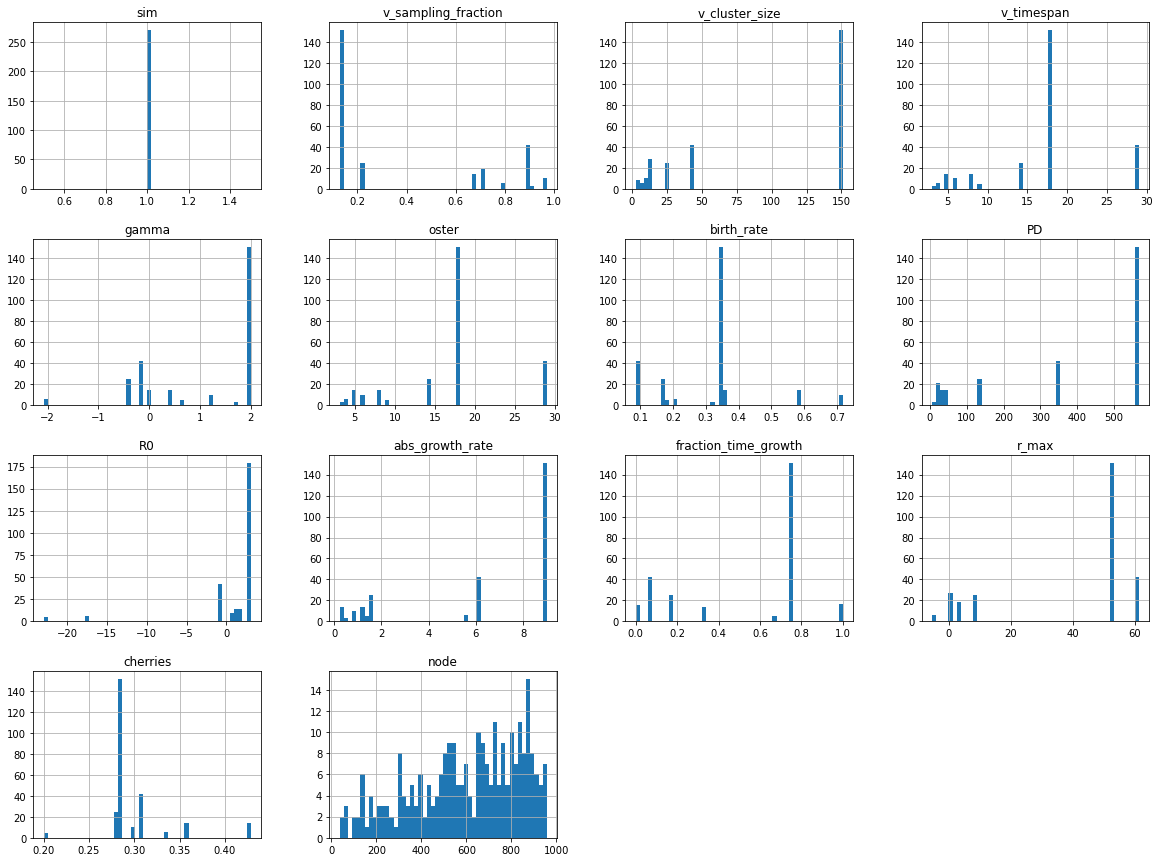

In [15]:
#Lets look at the histogram of all the features first

node_df.hist(bins=50,figsize=(20,15))

<AxesSubplot:>

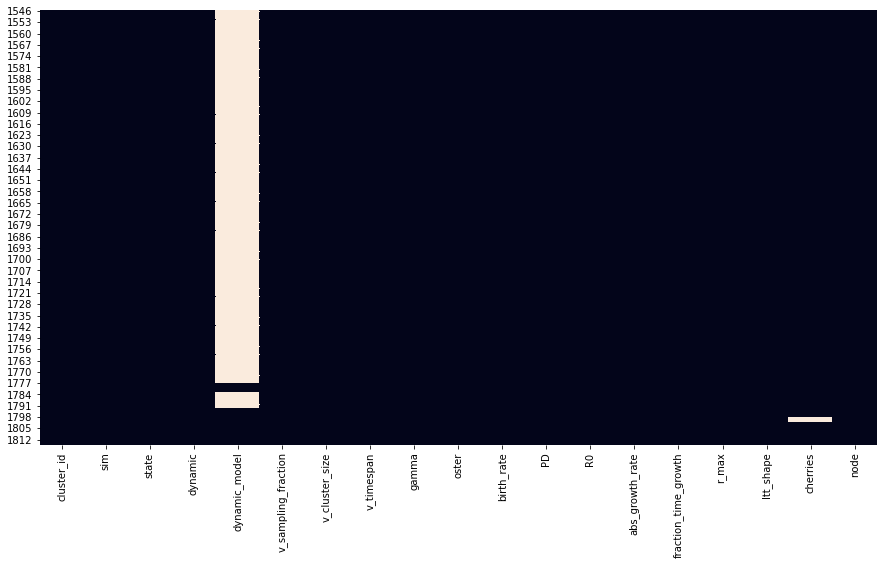

In [16]:
# Now using heatmaps
plt.figure(figsize=(15,8))
sns.heatmap(node_df.isnull(), cbar=False)
# FRom this heatmap too it is evident that the above 2 mentioned vars have more missing values

<AxesSubplot:>

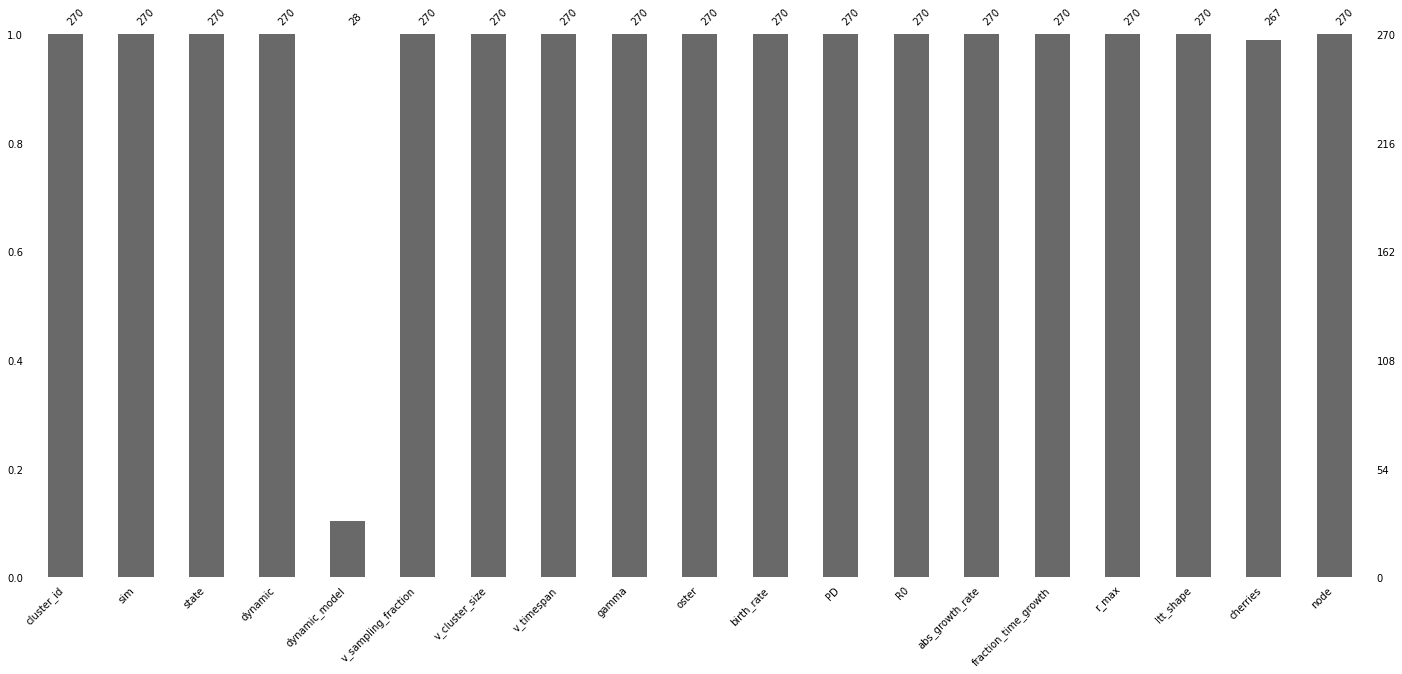

In [17]:
# Next is to use the missingno library to analyze the missing values
import missingno as msno 

msno.bar(node_df,labels=True,fontsize=10) 

<AxesSubplot:>

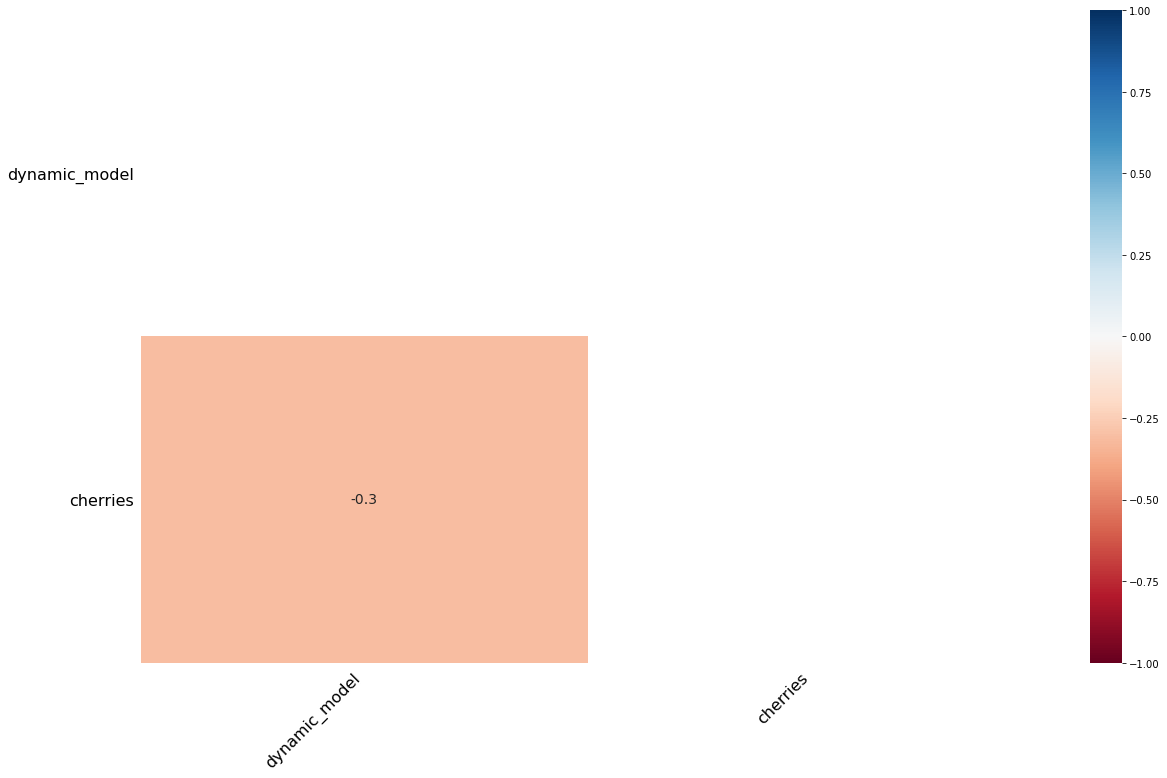

In [18]:
# The missingno correlation heatmap measures nullity correlation: 
# how strongly the presence or absence of one variable affects the presence of another:
msno.heatmap(node_df,labels=True) 

# Entries marked <1 or >-1 have a correlation that is close to being exactingly negative or positive, but is still not quite perfectly so
# Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does)

In [19]:
node_df['dynamic_model'].unique()

array([nan, 'exp', 'lin'], dtype=object)

### Preprocessing

* Drop the missing values
* Fill with meaningful values
* Fill with stat values 
    * **cherries**: median, mean, max, condition on the sampling fraction to choose the best one.

Median: 0.28476821192053003


count    267.000000
mean       0.299625
std        0.037926
min        0.200000
25%        0.284768
50%        0.284768
75%        0.309524
max        0.428571
Name: cherries, dtype: float64

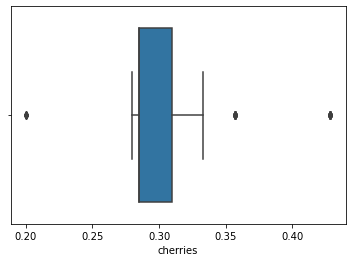

In [20]:
# variable - cherries 
# it is afloat variable , so missing values can be replaced by using median/mean - central tendency mneasures
# which one to use depends on the plot of the data
# https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
sns.boxplot(x=node_df[node_df['cherries'].notna()]['cherries'])
median = np.median(node_df[node_df['cherries'].notna()]['cherries'].values)
print(f"Median: {median}")
cherries_df = node_df['cherries']
cherries_df[cherries_df.notna()].describe()

### The boxplot reference

![boxPlot](../img/boxplot_ref.png)

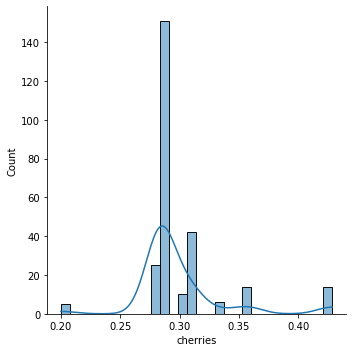

In [21]:
sns.displot(node_df[node_df['cherries'].notna()]['cherries'], kde=True)

### Impute the missing value for dynamic_model

In [22]:
# impute the missing values in dynamic_model using "stable"
dynamic_model_values = {'dynamic_model': 'stable'}
node_df.fillna(value=dynamic_model_values, inplace=True)

In [23]:
node_df.head()

,cluster_id,sim,state,dynamic,dynamic_model,v_sampling_fraction,v_cluster_size,v_timespan,gamma,oster,birth_rate,PD,R0,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,cherries,node
1546,c1,1,A,static,stable,0.901797,42.0,29.0,-0.127487,29.012191,0.086207,347.0,-0.820473,6.023811,0.076923,61.412236,concave,0.309524,509
1547,c1,1,A,static,stable,0.901797,42.0,29.0,-0.127487,29.012191,0.086207,347.0,-0.820473,6.023811,0.076923,61.412236,concave,0.309524,527
1548,c1,1,A,static,stable,0.901797,42.0,29.0,-0.127487,29.012191,0.086207,347.0,-0.820473,6.023811,0.076923,61.412236,concave,0.309524,59
1549,c1,1,A,static,stable,0.901797,42.0,29.0,-0.127487,29.012191,0.086207,347.0,-0.820473,6.023811,0.076923,61.412236,concave,0.309524,68
1550,c1,1,A,static,stable,0.901797,42.0,29.0,-0.127487,29.012191,0.086207,347.0,-0.820473,6.023811,0.076923,61.412236,concave,0.309524,734


### Impute the missing value for cherries (TBD)

In [24]:
# impute the missing values in cherries using median
cherries_values = {'cherries': node_df['cherries'].median()}
node_df.fillna(cherries_values, inplace =True)

<AxesSubplot:>

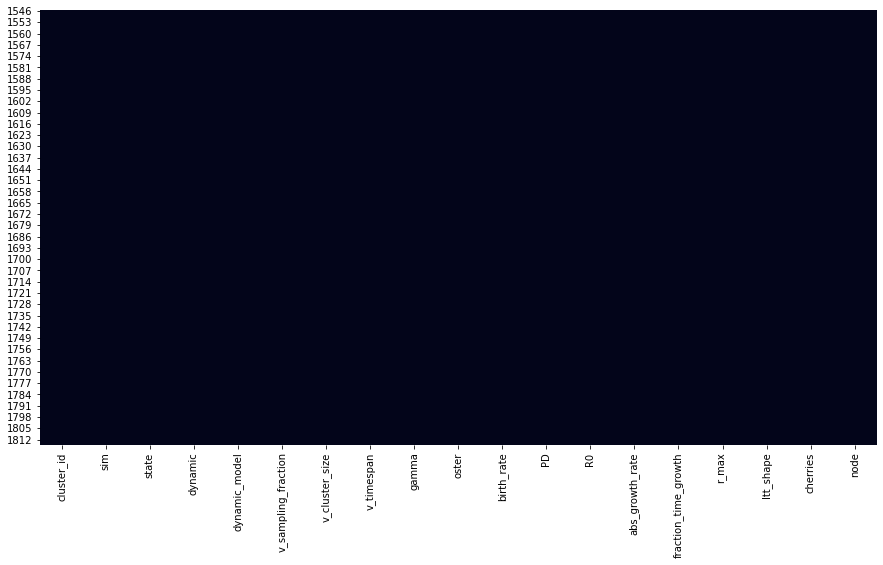

In [25]:
#Finally check the DF after the imputation process
# Now using heatmaps
plt.figure(figsize=(15,8))
sns.heatmap(node_df.isnull(), cbar=False)

### Categorical features i.e. dynamic_model and ltt_shape

In [26]:
node_df.head()

,cluster_id,sim,state,dynamic,dynamic_model,v_sampling_fraction,v_cluster_size,v_timespan,gamma,oster,birth_rate,PD,R0,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,cherries,node
1546,c1,1,A,static,stable,0.901797,42.0,29.0,-0.127487,29.012191,0.086207,347.0,-0.820473,6.023811,0.076923,61.412236,concave,0.309524,509
1547,c1,1,A,static,stable,0.901797,42.0,29.0,-0.127487,29.012191,0.086207,347.0,-0.820473,6.023811,0.076923,61.412236,concave,0.309524,527
1548,c1,1,A,static,stable,0.901797,42.0,29.0,-0.127487,29.012191,0.086207,347.0,-0.820473,6.023811,0.076923,61.412236,concave,0.309524,59
1549,c1,1,A,static,stable,0.901797,42.0,29.0,-0.127487,29.012191,0.086207,347.0,-0.820473,6.023811,0.076923,61.412236,concave,0.309524,68
1550,c1,1,A,static,stable,0.901797,42.0,29.0,-0.127487,29.012191,0.086207,347.0,-0.820473,6.023811,0.076923,61.412236,concave,0.309524,734


In [27]:
#First of all we need to get thecolumns where the categorical features are present
# idea is to extract all the columns with type as object
node_df.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [28]:
for types in node_df.dtypes.unique():
    print(types,len(node_df.select_dtypes(types).columns))
    print(node_df.select_dtypes(types).columns)
    print('===')

object 5
Index(['cluster_id', 'state', 'dynamic', 'dynamic_model', 'ltt_shape'], dtype='object')
===
int64 2
Index(['sim', 'node'], dtype='object')
===
float64 12
Index(['v_sampling_fraction', 'v_cluster_size', 'v_timespan', 'gamma', 'oster',
       'birth_rate', 'PD', 'R0', 'abs_growth_rate', 'fraction_time_growth',
       'r_max', 'cherries'],
      dtype='object')
===


In [29]:
# Category the ltt_shape and dynamic_model

# node_df = node_df.astype({'ltt_shape': 'category'}, copy=False)
node_df["ltt_shape"] = node_df["ltt_shape"].astype('category')
node_df["ltt_shape_cat"] = node_df["ltt_shape"].cat.codes
print(dict(enumerate(node_df['ltt_shape'].cat.categories)))
      
node_df["dynamic_model"] = node_df["dynamic_model"].astype('category')
node_df["dynamic_model_cat"] = node_df["dynamic_model"].cat.codes
print(dict(enumerate(node_df['dynamic_model'].cat.categories)))
node_df.head()

{0: 'concave', 1: 'convex', 2: 'convex_concave'}
{0: 'exp', 1: 'lin', 2: 'stable'}


,cluster_id,sim,state,dynamic,dynamic_model,v_sampling_fraction,v_cluster_size,v_timespan,gamma,oster,...,PD,R0,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,cherries,node,ltt_shape_cat,dynamic_model_cat
1546,c1,1,A,static,stable,0.901797,42.0,29.0,-0.127487,29.012191,...,347.0,-0.820473,6.023811,0.076923,61.412236,concave,0.309524,509,0,2
1547,c1,1,A,static,stable,0.901797,42.0,29.0,-0.127487,29.012191,...,347.0,-0.820473,6.023811,0.076923,61.412236,concave,0.309524,527,0,2
1548,c1,1,A,static,stable,0.901797,42.0,29.0,-0.127487,29.012191,...,347.0,-0.820473,6.023811,0.076923,61.412236,concave,0.309524,59,0,2
1549,c1,1,A,static,stable,0.901797,42.0,29.0,-0.127487,29.012191,...,347.0,-0.820473,6.023811,0.076923,61.412236,concave,0.309524,68,0,2
1550,c1,1,A,static,stable,0.901797,42.0,29.0,-0.127487,29.012191,...,347.0,-0.820473,6.023811,0.076923,61.412236,concave,0.309524,734,0,2


In [30]:
for types in node_df.dtypes.unique():
    print(types,len(node_df.select_dtypes(types).columns))
    print(node_df.select_dtypes(types).columns)

object 3
Index(['cluster_id', 'state', 'dynamic'], dtype='object')
int64 2
Index(['sim', 'node'], dtype='object')
category 2
Index(['dynamic_model', 'ltt_shape'], dtype='object')
float64 12
Index(['v_sampling_fraction', 'v_cluster_size', 'v_timespan', 'gamma', 'oster',
       'birth_rate', 'PD', 'R0', 'abs_growth_rate', 'fraction_time_growth',
       'r_max', 'cherries'],
      dtype='object')
category 2
Index(['dynamic_model', 'ltt_shape'], dtype='object')
int8 2
Index(['ltt_shape_cat', 'dynamic_model_cat'], dtype='object')


### Process R0: removes the negative values (TODO: Median or  binary encoding using quartiles + unknown)

count    270.000000
mean       0.980888
std        4.522933
min      -22.934343
25%        1.246700
50%        2.548127
75%        2.548127
max        3.055500
Name: R0, dtype: float64


<AxesSubplot:xlabel='R0'>

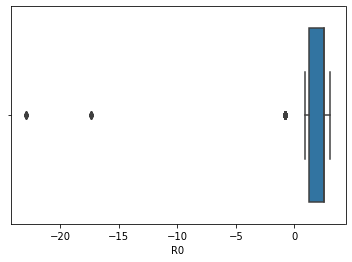

In [31]:
print(node_df['R0'].describe())
sns.boxplot(x=node_df[node_df['R0'].notna()]['R0'])

In [32]:
# Mark the negavie values as NA
node_df.loc[node_df['R0'] < 0, 'R0'] = None

<AxesSubplot:xlabel='R0'>

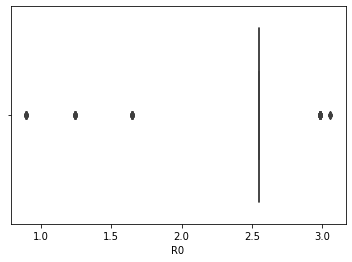

In [33]:
sns.boxplot(x=node_df[node_df['R0'].notna()]['R0'])

In [34]:
r0_cats, bins = pd.qcut(node_df['R0'], 4, retbins=True, duplicates='drop')
r0_cat_dict = {cat: i for i, cat in enumerate(r0_cats.unique())}
print(bins)
print(r0_cat_dict)

[0.89595066 2.5481268  3.05549966]
{nan: 0, Interval(0.895, 2.548, closed='right'): 1, Interval(2.548, 3.055, closed='right'): 2}


In [35]:
test_df = node_df.copy()

In [36]:
node_df['R0_bin'] = r0_cats
node_df['R0_cat'] = node_df['R0_bin'].replace(r0_cat_dict, inplace=False)

In [37]:
node_df.tail()

,cluster_id,sim,state,dynamic,dynamic_model,v_sampling_fraction,v_cluster_size,v_timespan,gamma,oster,...,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,cherries,node,ltt_shape_cat,dynamic_model_cat,R0_bin,R0_cat
1811,c9,1,F.1,growth,exp,0.708468,14.0,8.0,0.404255,8.042763,...,1.266952,0.333333,3.800857,convex,0.357143,846,1,0,"(0.895, 2.548]",1
1812,c9,1,F.1,growth,exp,0.708468,14.0,8.0,0.404255,8.042763,...,1.266952,0.333333,3.800857,convex,0.357143,146,1,0,"(0.895, 2.548]",1
1813,c9,1,F.1,growth,exp,0.708468,14.0,8.0,0.404255,8.042763,...,1.266952,0.333333,3.800857,convex,0.357143,541,1,0,"(0.895, 2.548]",1
1814,c9,1,F.1,growth,exp,0.708468,14.0,8.0,0.404255,8.042763,...,1.266952,0.333333,3.800857,convex,0.357143,677,1,0,"(0.895, 2.548]",1
1815,c9,1,F.1,growth,exp,0.708468,14.0,8.0,0.404255,8.042763,...,1.266952,0.333333,3.800857,convex,0.357143,384,1,0,"(0.895, 2.548]",1


<AxesSubplot:>

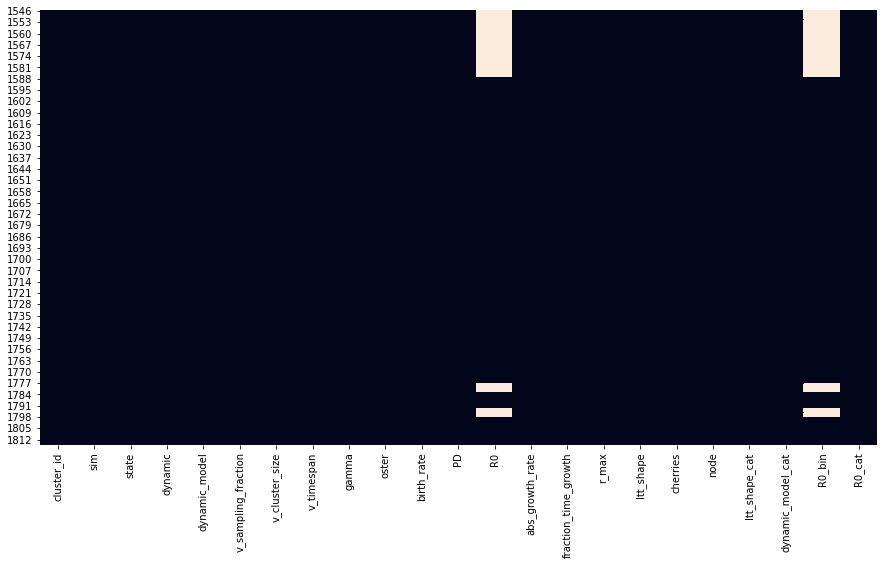

In [38]:
# Now using heatmaps
plt.figure(figsize=(15,8))
sns.heatmap(node_df.isnull(), cbar=False)

### Label encoding
* Convert the dynamic column to the int value

In [39]:
node_df["dynamic"] = node_df["dynamic"].astype('category')
node_df["dynamic_cat"] = node_df["dynamic"].cat.codes
print(dict(enumerate(node_df['dynamic'].cat.categories)))
node_df.head()

{0: 'decay', 1: 'growth', 2: 'static'}


,cluster_id,sim,state,dynamic,dynamic_model,v_sampling_fraction,v_cluster_size,v_timespan,gamma,oster,...,fraction_time_growth,r_max,ltt_shape,cherries,node,ltt_shape_cat,dynamic_model_cat,R0_bin,R0_cat,dynamic_cat
1546,c1,1,A,static,stable,0.901797,42.0,29.0,-0.127487,29.012191,...,0.076923,61.412236,concave,0.309524,509,0,2,NaN,0,2
1547,c1,1,A,static,stable,0.901797,42.0,29.0,-0.127487,29.012191,...,0.076923,61.412236,concave,0.309524,527,0,2,NaN,0,2
1548,c1,1,A,static,stable,0.901797,42.0,29.0,-0.127487,29.012191,...,0.076923,61.412236,concave,0.309524,59,0,2,NaN,0,2
1549,c1,1,A,static,stable,0.901797,42.0,29.0,-0.127487,29.012191,...,0.076923,61.412236,concave,0.309524,68,0,2,NaN,0,2
1550,c1,1,A,static,stable,0.901797,42.0,29.0,-0.127487,29.012191,...,0.076923,61.412236,concave,0.309524,734,0,2,NaN,0,2


### Analyze the relationship between categorical features and label

In [40]:
from sklearn.feature_selection import chi2, mutual_info_classif

cat_feat_cols = ['ltt_shape_cat', 'dynamic_model_cat', 'R0_cat']
chi2_sts, p_vals = chi2(node_df[cat_feat_cols], node_df['dynamic_cat'])
mis = mutual_info_classif(node_df[cat_feat_cols], node_df['dynamic_cat'])

for cat, chi2, p_val, mi in zip(cat_feat_cols, chi2_sts, p_vals, mis):
    degree_freedom = (len(node_df['dynamic_cat'].unique()) - 1) * (len(node_df[cat].unique())-1)
    print(f'{cat}: \n  df: {degree_freedom}, chi2: {chi2}, p_vals: {p_val}\n  MI: {mi}')

ltt_shape_cat: 
  df: 4, chi2: 25.789256198347108, p_vals: 2.5115057126210924e-06
  MI: 0.2600925899237223
dynamic_model_cat: 
  df: 4, chi2: 39.224295213198694, p_vals: 3.0377534039237553e-09
  MI: 0.30656706905677744
R0_cat: 
  df: 4, chi2: 11.470935481630672, p_vals: 0.0032293715061652625
  MI: 0.08498720679561123


In [41]:
num_feat_cols = ["v_sampling_fraction", "v_cluster_size", "v_timespan", "gamma", "oster", "birth_rate", "PD",
                 "abs_growth_rate", "fraction_time_growth", "r_max","cherries"]
cat_feat_cols = ["ltt_shape_cat", "dynamic_model_cat", "R0_cat"]

label_col = ["dynamic_cat"]
input_col = num_feat_cols + cat_feat_cols + label_col

input_df = node_df[input_col]
print(input_df.shape, f"num_feat: {len(num_feat_cols)}, cat_feat: {len(cat_feat_cols)}, label: {len(label_col)}")

(270, 15) num_feat: 11, cat_feat: 3, label: 1


In [42]:
# After converting category to numerical

numerical_feats = input_df.dtypes[input_df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = input_df.dtypes[input_df.dtypes == "category"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  15
Number of Categorical features:  0


In [43]:
# Compute pairwise correlation of columns (pearson R: standard correlation coefficient)
input_df.corr()

,v_sampling_fraction,v_cluster_size,v_timespan,gamma,oster,birth_rate,PD,abs_growth_rate,fraction_time_growth,r_max,cherries,ltt_shape_cat,dynamic_model_cat,R0_cat,dynamic_cat
v_sampling_fraction,1.000000,-0.826797,0.020509,-0.702847,0.022114,-0.180274,-0.700760,-0.624655,-0.658946,-0.327148,0.459044,0.283110,-0.342199,-0.582776,-0.351282
v_cluster_size,-0.826797,1.000000,0.294561,0.880858,0.293353,0.177927,0.957335,0.924316,0.677249,0.715016,-0.456477,-0.723761,0.438007,0.129262,0.438067
v_timespan,0.020509,0.294561,1.000000,0.060897,0.999997,-0.672925,0.555935,0.542637,-0.247366,0.859701,-0.326041,-0.632977,0.460347,-0.501594,0.484447
gamma,-0.702847,0.880858,0.060897,1.000000,0.059379,0.456485,0.780953,0.705375,0.744856,0.512125,-0.430996,-0.557308,0.263214,0.239666,0.378492
oster,0.022114,0.293353,0.999997,0.059379,1.000000,-0.673542,0.554955,0.542060,-0.248288,0.859289,-0.325031,-0.632915,0.460093,-0.502904,0.483455
birth_rate,-0.180274,0.177927,-0.672925,0.456485,-0.673542,1.000000,-0.044140,-0.093762,0.516547,-0.338462,0.320804,0.162189,0.026452,0.340419,0.104778
PD,-0.700760,0.957335,0.555935,0.780953,0.554955,-0.044140,1.000000,0.972258,0.519735,0.883835,-0.481894,-0.831928,0.523890,-0.054951,0.520205
abs_growth_rate,-0.624655,0.924316,0.542637,0.705375,0.542060,-0.093762,0.972258,1.000000,0.450533,0.871835,-0.478077,-0.865681,0.443948,-0.189412,0.361802
fraction_time_growth,-0.658946,0.677249,-0.247366,0.744856,-0.248288,0.516547,0.519735,0.450533,1.000000,0.203425,-0.003454,-0.438920,0.136771,0.299663,0.170007
r_max,-0.327148,0.715016,0.859701,0.512125,0.859289,-0.338462,0.883835,0.871835,0.203425,1.000000,-0.394653,-0.892990,0.524583,-0.393099,0.536556


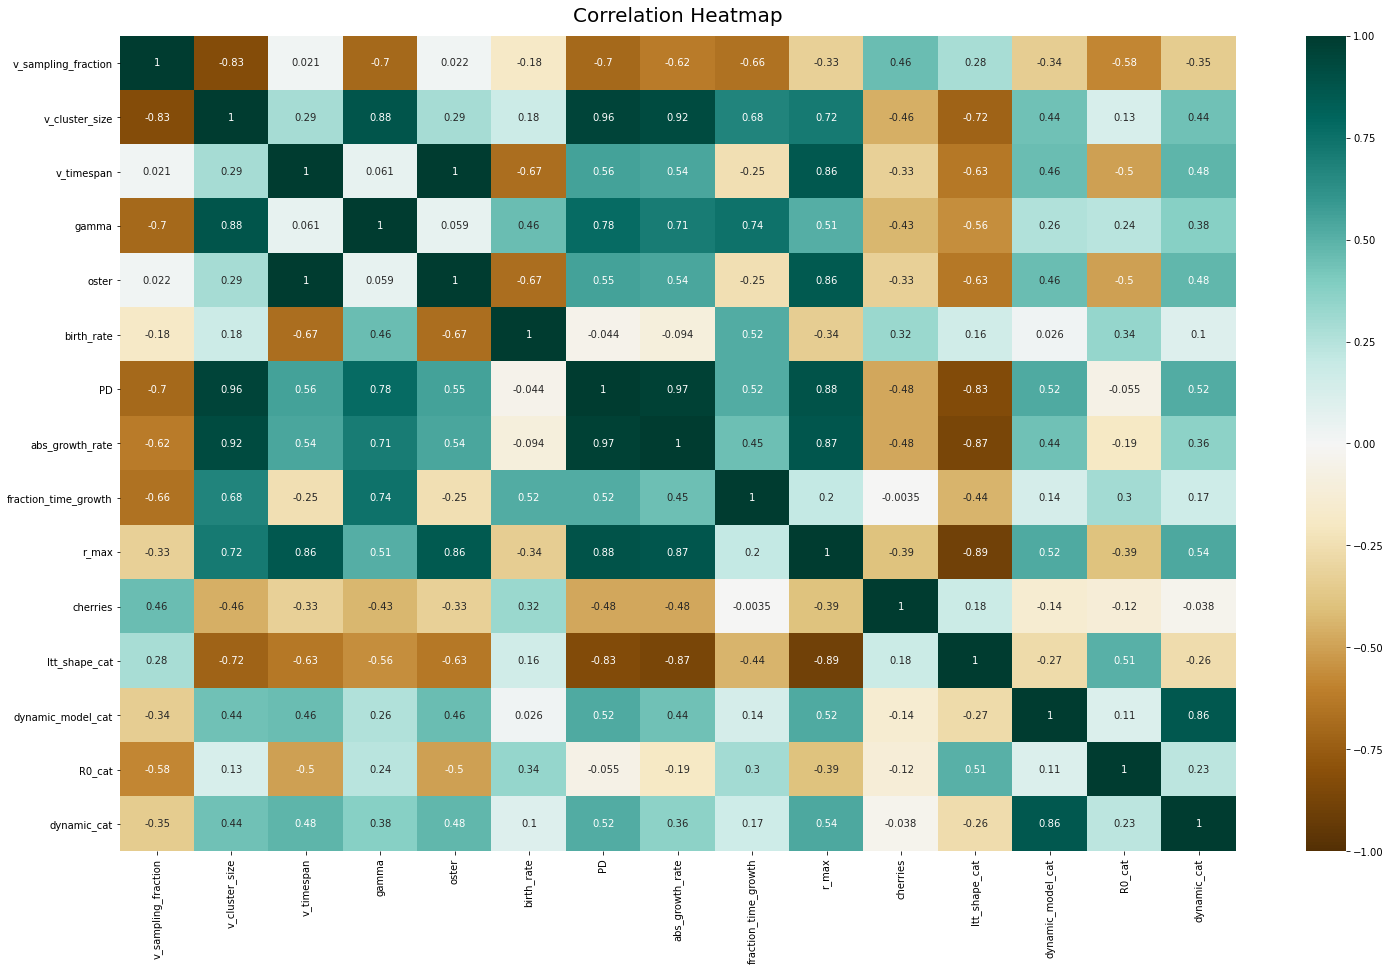

In [44]:
# Pearson Correlation Matrix

# Increase the size of the heatmap.
plt.figure(figsize=(25, 15))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(input_df.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=14);

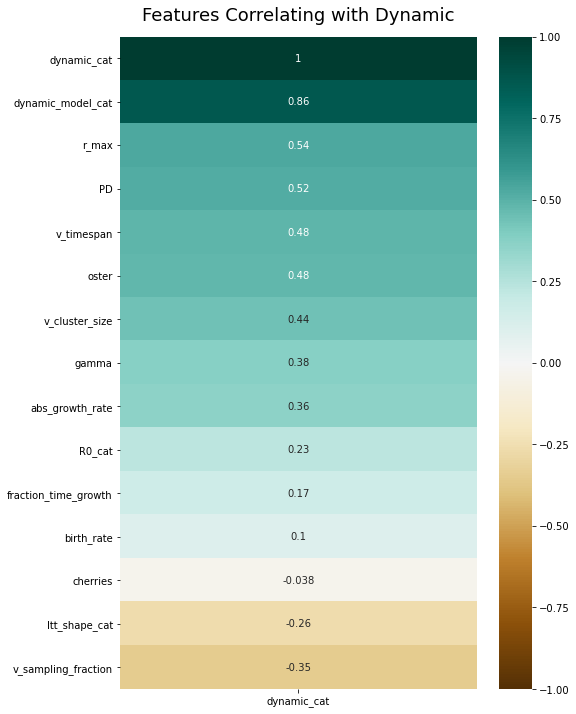

In [45]:
#check the features that are highly correlated to the output variable
plt.figure(figsize=(8, 12))
heatmap_outputvar = sns.heatmap(input_df.corr()[['dynamic_cat']].sort_values(by='dynamic_cat', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap_outputvar.set_title('Features Correlating with Dynamic', fontdict={'fontsize':18}, pad=16);

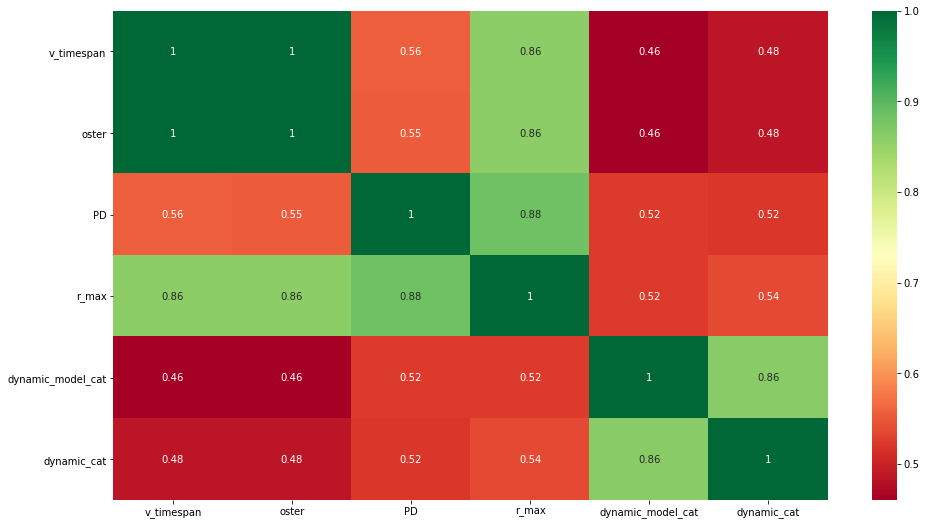

In [46]:
# most correlated features

corrmat = input_df.corr()
top_corr_features = corrmat.index[abs(corrmat['dynamic_cat'])>0.45]
plt.figure(figsize=(16,9))
g = sns.heatmap(input_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [47]:
# Compute pairwise correlation of columns (Spearman rank correlation, non-linear)
input_df.corr("spearman")

,v_sampling_fraction,v_cluster_size,v_timespan,gamma,oster,birth_rate,PD,abs_growth_rate,fraction_time_growth,r_max,cherries,ltt_shape_cat,dynamic_model_cat,R0_cat,dynamic_cat
v_sampling_fraction,1.000000,-0.888729,-0.122669,-0.856430,-0.122669,-0.347317,-0.889553,-0.871032,-0.733906,-0.128863,0.563155,0.538841,-0.350676,-0.413801,-0.353877
v_cluster_size,-0.888729,1.000000,0.538348,0.857287,0.538348,0.125842,0.998865,0.982787,0.558815,0.540361,-0.404561,-0.837139,0.539337,0.101818,0.544371
v_timespan,-0.122669,0.538348,1.000000,0.192999,1.000000,-0.538528,0.541591,0.533403,-0.145296,0.997153,0.060498,-0.833770,0.499809,-0.559039,0.504769
gamma,-0.856430,0.857287,0.192999,1.000000,0.192999,0.523323,0.859832,0.846670,0.720971,0.192126,-0.318144,-0.651512,0.264856,0.179749,0.276734
oster,-0.122669,0.538348,1.000000,0.192999,1.000000,-0.538528,0.541591,0.533403,-0.145296,0.997153,0.060498,-0.833770,0.499809,-0.559039,0.504769
birth_rate,-0.347317,0.125842,-0.538528,0.523323,-0.538528,1.000000,0.117369,0.067413,0.558813,-0.540450,0.165189,0.130477,-0.116304,0.356261,-0.086990
PD,-0.889553,0.998865,0.541591,0.859832,0.541591,0.117369,1.000000,0.984371,0.551477,0.543323,-0.417666,-0.838346,0.512242,0.096708,0.518804
abs_growth_rate,-0.871032,0.982787,0.533403,0.846670,0.533403,0.067413,0.984371,1.000000,0.487193,0.530686,-0.426598,-0.840634,0.448154,0.034508,0.442641
fraction_time_growth,-0.733906,0.558815,-0.145296,0.720971,-0.145296,0.558813,0.551477,0.487193,1.000000,-0.110359,-0.224172,-0.323837,0.204566,0.399649,0.212955
r_max,-0.128863,0.540361,0.997153,0.192126,0.997153,-0.540450,0.543323,0.530686,-0.110359,1.000000,0.072639,-0.839327,0.488305,-0.541972,0.494468


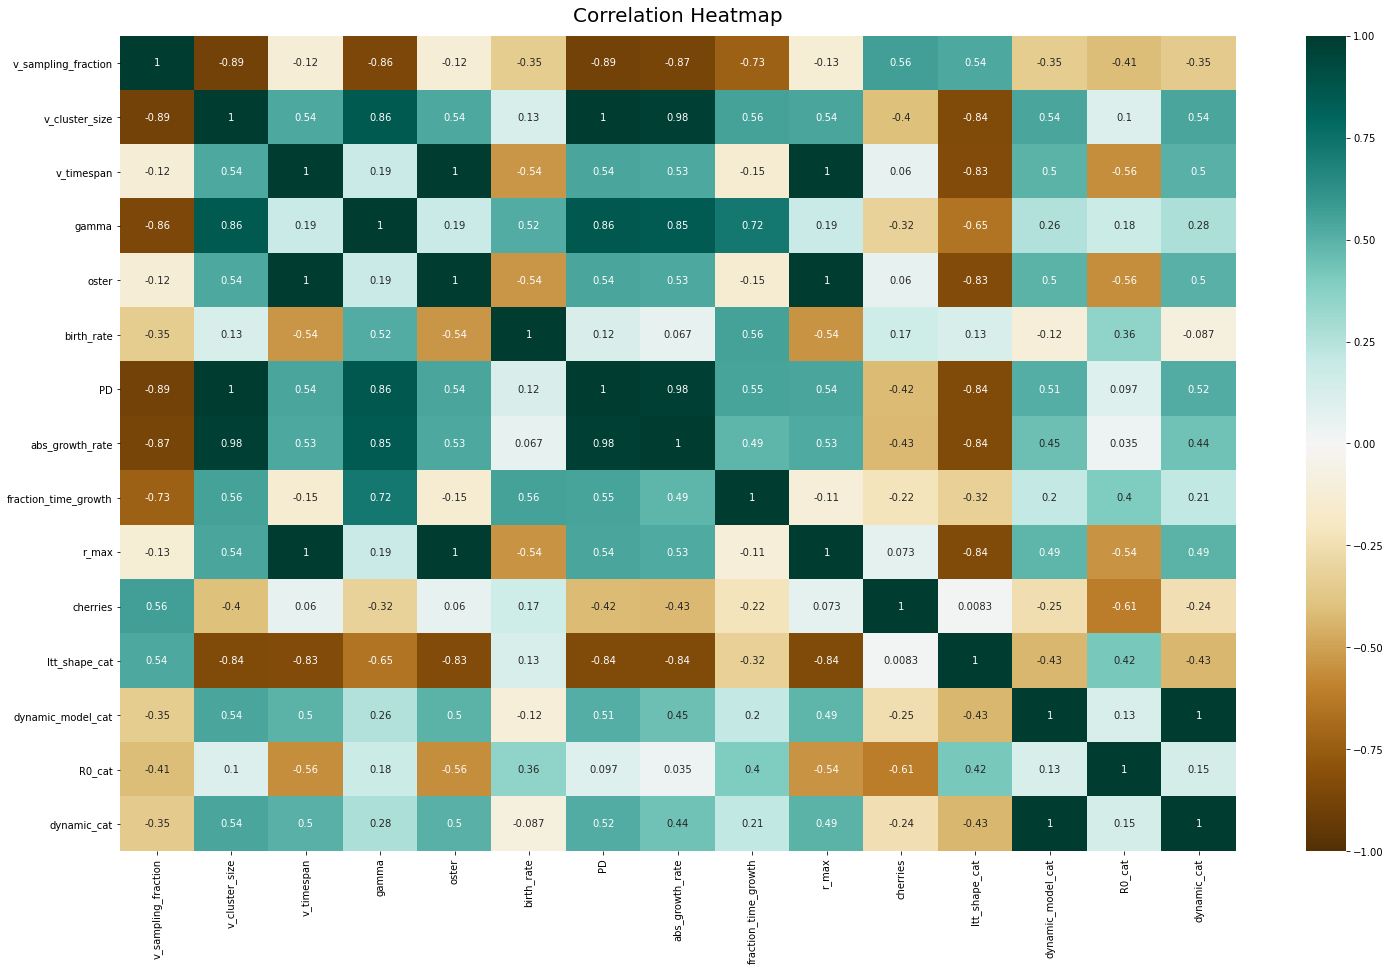

In [48]:
# Correlation Matrix

# Increase the size of the heatmap.
plt.figure(figsize=(25, 15))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(input_df.corr('spearman'), vmin=-1, vmax=1, annot=True,cmap='BrBG')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=14);

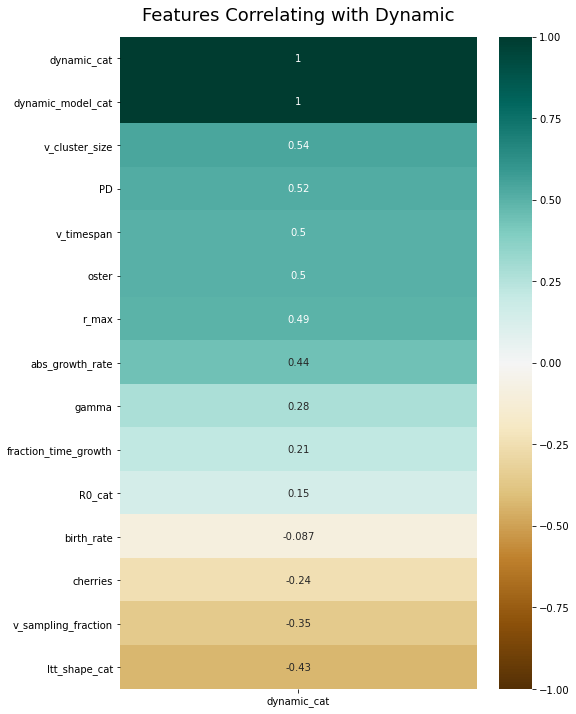

In [49]:
#check the features that are highly correlated to the output variable with Spearman
plt.figure(figsize=(8, 12))
heatmap_outputvar = sns.heatmap(input_df.corr('spearman')[['dynamic_cat']].sort_values(by='dynamic_cat', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap_outputvar.set_title('Features Correlating with Dynamic', fontdict={'fontsize':18}, pad=16);

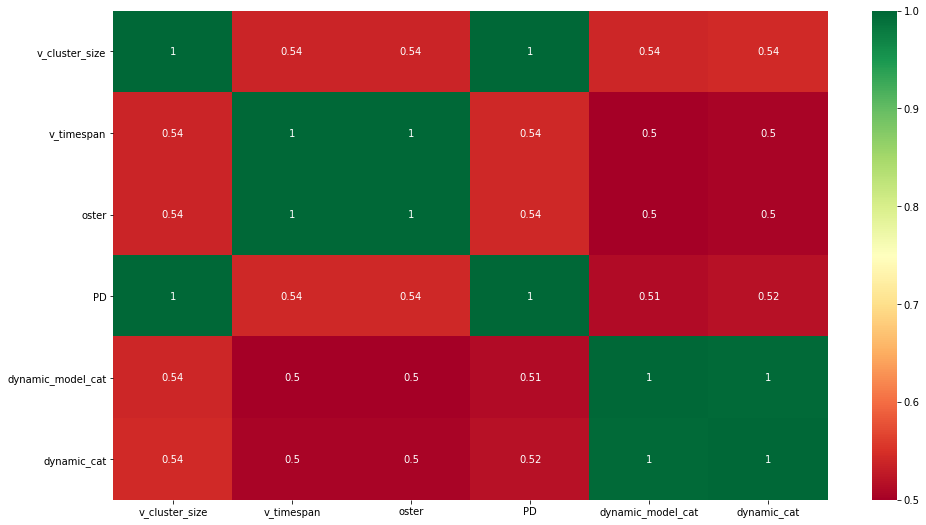

In [50]:
# most correlated features on spearman

corrmat = input_df.corr('spearman')
top_corr_features = corrmat.index[abs(corrmat['dynamic_cat'])>0.5]
plt.figure(figsize=(16,9))
g = sns.heatmap(input_df[top_corr_features].corr('spearman'),annot=True,cmap="RdYlGn")

#### From the above correlation plots it is evident that the features that really matter the most are:

* dynamic_model
* r_max
* PD
* oster
* v_timespan
* R0 (After discretizing the R0, the correlation drops to low level)

#### oster and v_timespan have a perfect positive correlation (with correlation coefficient value = 1.0)?

### Target variable vs Numerical features

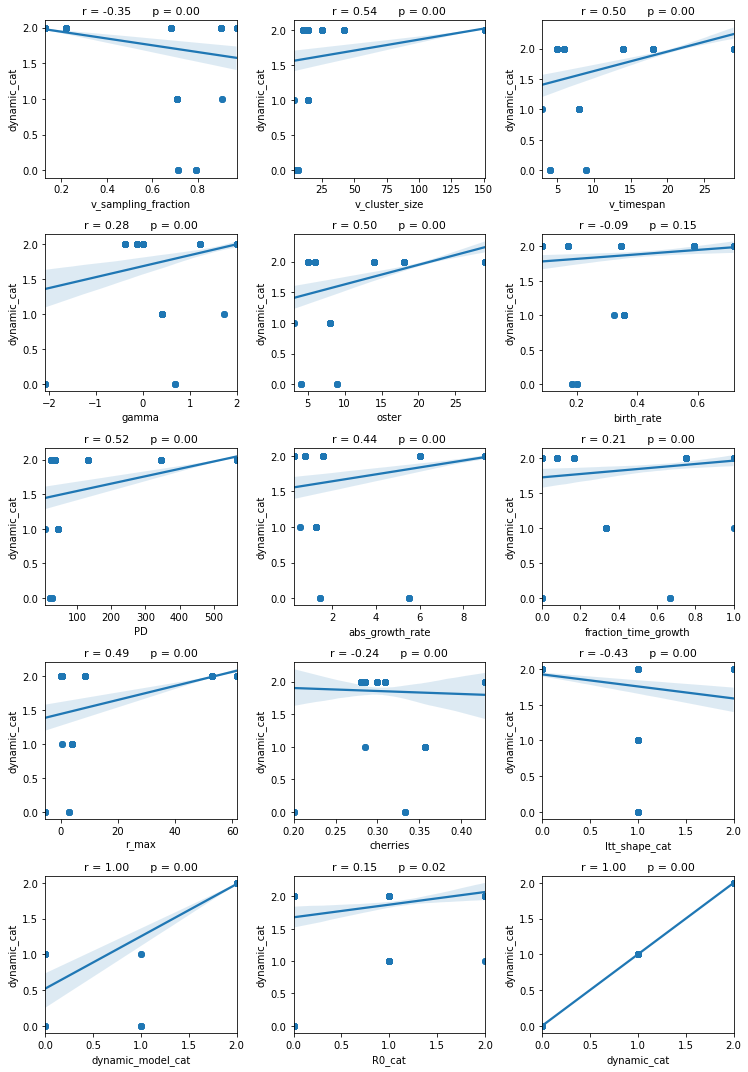

In [51]:
nr_rows = 5
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_plot_num_feats = [c for c in list(numerical_feats) ]

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(x=input_df[li_plot_num_feats[i]], y=input_df['dynamic_cat'], ax = axs[r][c])
            # stp = stats.pearsonr(input_df[numerical_feats[i]], input_df['dynamic_cat'])
            stp = stats.spearmanr(input_df[numerical_feats[i]], input_df['dynamic_cat'])
          
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   

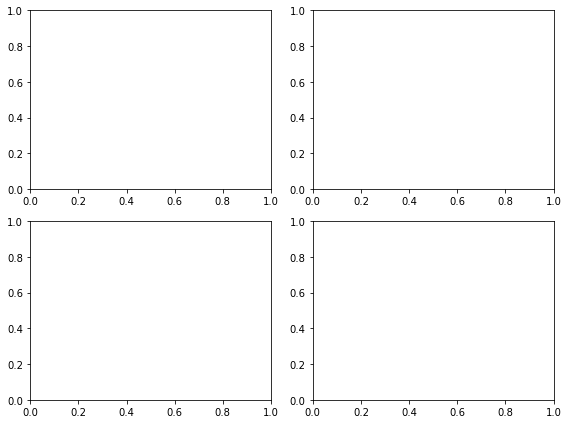

In [52]:
# skip
nr_rows = 2
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(categorical_feats):
            sns.boxplot(x=categorical_feats[i], y=node_df['dynamic_cat'], data=node_df, ax = axs[r][c])
    
plt.tight_layout()    
plt.show() 

### Modeling

In [53]:
input_df = input_df.reset_index()
input_df.head()

,index,v_sampling_fraction,v_cluster_size,v_timespan,gamma,oster,birth_rate,PD,abs_growth_rate,fraction_time_growth,r_max,cherries,ltt_shape_cat,dynamic_model_cat,R0_cat,dynamic_cat
0,1546,0.901797,42.0,29.0,-0.127487,29.012191,0.086207,347.0,6.023811,0.076923,61.412236,0.309524,0,2,0,2
1,1547,0.901797,42.0,29.0,-0.127487,29.012191,0.086207,347.0,6.023811,0.076923,61.412236,0.309524,0,2,0,2
2,1548,0.901797,42.0,29.0,-0.127487,29.012191,0.086207,347.0,6.023811,0.076923,61.412236,0.309524,0,2,0,2
3,1549,0.901797,42.0,29.0,-0.127487,29.012191,0.086207,347.0,6.023811,0.076923,61.412236,0.309524,0,2,0,2
4,1550,0.901797,42.0,29.0,-0.127487,29.012191,0.086207,347.0,6.023811,0.076923,61.412236,0.309524,0,2,0,2


#### One-hot encoding for the categorical feature, i.e., ltt_shape_cat, dynamic_model_cat, R0_cat

In [54]:
test_df = input_df.copy()

In [55]:
from sklearn.preprocessing import OneHotEncoder

cat_feats = ['ltt_shape_cat', 'R0_cat']
cat_onehot_feat = []
for cat_feat in cat_feats:
    enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
    x = enc.fit_transform(input_df[cat_feat].values.reshape(-1, 1))
    n_dims = x.shape[-1]
    columns = [f'{cat_feat}_{i}' for i in range(n_dims)]
    cat_onehot_feat += columns
    cat_df = pd.DataFrame(x, columns=columns)
    input_df = pd.concat([input_df, cat_df], axis=1)

In [56]:
input_df

,index,v_sampling_fraction,v_cluster_size,v_timespan,gamma,oster,birth_rate,PD,abs_growth_rate,fraction_time_growth,...,ltt_shape_cat,dynamic_model_cat,R0_cat,dynamic_cat,ltt_shape_cat_0,ltt_shape_cat_1,ltt_shape_cat_2,R0_cat_0,R0_cat_1,R0_cat_2
0,1546,0.901797,42.0,29.0,-0.127487,29.012191,0.086207,347.0,6.023811,0.076923,...,0,2,0,2,1.0,0.0,0.0,1.0,0.0,0.0
1,1547,0.901797,42.0,29.0,-0.127487,29.012191,0.086207,347.0,6.023811,0.076923,...,0,2,0,2,1.0,0.0,0.0,1.0,0.0,0.0
2,1548,0.901797,42.0,29.0,-0.127487,29.012191,0.086207,347.0,6.023811,0.076923,...,0,2,0,2,1.0,0.0,0.0,1.0,0.0,0.0
3,1549,0.901797,42.0,29.0,-0.127487,29.012191,0.086207,347.0,6.023811,0.076923,...,0,2,0,2,1.0,0.0,0.0,1.0,0.0,0.0
4,1550,0.901797,42.0,29.0,-0.127487,29.012191,0.086207,347.0,6.023811,0.076923,...,0,2,0,2,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1811,0.708468,14.0,8.0,0.404255,8.042763,0.356274,44.0,1.266952,0.333333,...,1,0,1,1,0.0,1.0,0.0,0.0,1.0,0.0
266,1812,0.708468,14.0,8.0,0.404255,8.042763,0.356274,44.0,1.266952,0.333333,...,1,0,1,1,0.0,1.0,0.0,0.0,1.0,0.0
267,1813,0.708468,14.0,8.0,0.404255,8.042763,0.356274,44.0,1.266952,0.333333,...,1,0,1,1,0.0,1.0,0.0,0.0,1.0,0.0
268,1814,0.708468,14.0,8.0,0.404255,8.042763,0.356274,44.0,1.266952,0.333333,...,1,0,1,1,0.0,1.0,0.0,0.0,1.0,0.0


#### Remove features:
* usless: index
* redundant: cat_feats = ['ltt_shape_cat', 'R0_cat']
* label highly-correlated: 'dynamic_model_cat' 

In [57]:
input_df.columns 

Index(['index', 'v_sampling_fraction', 'v_cluster_size', 'v_timespan', 'gamma',
       'oster', 'birth_rate', 'PD', 'abs_growth_rate', 'fraction_time_growth',
       'r_max', 'cherries', 'ltt_shape_cat', 'dynamic_model_cat', 'R0_cat',
       'dynamic_cat', 'ltt_shape_cat_0', 'ltt_shape_cat_1', 'ltt_shape_cat_2',
       'R0_cat_0', 'R0_cat_1', 'R0_cat_2'],
      dtype='object')

In [58]:
rm_col =  ['index', 'ltt_shape_cat', 'dynamic_model_cat', 'R0_cat']
y = input_df[label_col]
x = input_df.drop(rm_col+label_col, axis=1)

In [59]:
print(x.columns)
print(y.columns)

Index(['v_sampling_fraction', 'v_cluster_size', 'v_timespan', 'gamma', 'oster',
       'birth_rate', 'PD', 'abs_growth_rate', 'fraction_time_growth', 'r_max',
       'cherries', 'ltt_shape_cat_0', 'ltt_shape_cat_1', 'ltt_shape_cat_2',
       'R0_cat_0', 'R0_cat_1', 'R0_cat_2'],
      dtype='object')
Index(['dynamic_cat'], dtype='object')


In [60]:
x.shape, y.shape

((270, 17), (270, 1))

In [61]:
from sklearn.model_selection import  train_test_split
#split the data to train the model 
random_seed = 123
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_seed)
print(f"Train: {len(x_train)}, Test: {len(x_test)}")

Train: 216, Test: 54


In [62]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import log_loss

n_folds = 5
print(f"CV: {n_folds}")

CV: 5


### Linear model

In [63]:
def rmse_CV_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=random_seed).split(x_train)
    rmse = np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv=kf))
    return rmse

In [64]:
lr = LinearRegression()

losses = rmse_CV_train(lr)
print(f"RMSE loss on train: {losses.mean()} ({losses})")

RMSE loss on train: 7.721452333536581e-15 ([5.63565575e-15 4.41928053e-15 1.58133497e-14 5.51734424e-15
 7.22163149e-15])


In [65]:
lr.fit(x_train, y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

pred_df1 = pd.DataFrame({'y_test': y_test.values.reshape(-1), 
                         'y_pred': y_test_pred.reshape(-1), 
                         'diff_abs': abs(y_test-y_test_pred).values.reshape(-1)})
print(pred_df1)

    y_test        y_pred      diff_abs
0        2  2.000000e+00  3.552714e-15
1        2  2.000000e+00  1.487699e-14
2        2  2.000000e+00  3.996803e-15
3        2  2.000000e+00  3.552714e-15
4        2  2.000000e+00  1.021405e-14
5        2  2.000000e+00  1.021405e-14
6        2  2.000000e+00  3.996803e-15
7        2  2.000000e+00  3.552714e-15
8        2  2.000000e+00  3.996803e-15
9        0 -1.287859e-14  1.287859e-14
10       0 -1.287859e-14  1.287859e-14
11       1  1.000000e+00  1.199041e-14
12       2  2.000000e+00  1.487699e-14
13       2  2.000000e+00  1.487699e-14
14       2  2.000000e+00  3.552714e-15
15       2  2.000000e+00  3.996803e-15
16       2  2.000000e+00  3.996803e-15
17       2  2.000000e+00  1.776357e-15
18       0 -1.287859e-14  1.287859e-14
19       2  2.000000e+00  3.996803e-15
20       2  2.000000e+00  3.552714e-15
21       2  2.000000e+00  1.776357e-15
22       1  1.000000e+00  9.325873e-15
23       2  2.000000e+00  3.996803e-15
24       2  2.000000e+00 

In [66]:
lr.coef_

array([[ 0.0907261 , -0.09635883, -0.11892231, -0.23204798, -0.11860208,
         0.26186339,  0.04093362, -0.45602647, -0.14507347, -0.02513123,
         0.05797087,  0.02683976, -0.3853757 ,  0.35853594, -0.1772617 ,
         0.44295638, -0.26569468]])

### Softmax regression model

In [67]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_train_minmax[0]

array([0.        , 1.        , 0.57692308, 1.        , 0.57547419,
       0.41101692, 1.        , 1.        , 0.75      , 0.87066414,
       0.37086093, 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        ])

In [68]:
x_test_minmax = min_max_scaler.transform(x_test)
x_test_minmax[0]

array([0.91851086, 0.26351351, 1.        , 0.47832938, 1.        ,
       0.        , 0.60784314, 0.66037313, 0.07692308, 1.        ,
       0.47916667, 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        ])

In [94]:
y_train_array = y_train['dynamic_cat'].values
y_test_array = y_test['dynamic_cat'].values

In [113]:
# Apply cross validation to select the best hypter parameters
def cross_entropy_CV_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=random_seed).split(x_train_minmax)
    val_accs = cross_val_score(model, x_train_minmax, y_train_array, scoring='accuracy', cv=kf)
    return val_accs

In [114]:
# Add weight balance to the model, important to the model performance
logistic_r = LogisticRegression(max_iter=1000, class_weight='balanced')

val_accs = cross_entropy_CV_train(logistic_r)
print(f"Accuracy on train: {val_accs.mean()} ({val_accs})")

Accuracy on train: 0.9583509513742072 ([0.95454545 0.93023256 0.97674419 0.97674419 0.95348837])


In [115]:
logistic_r.fit(x_train_minmax, y_train_array)
y_test_pred_softmax_r = logistic_r.predict(x_test_minmax)
print(y_test_pred_softmax_r)

[2 2 2 2 1 1 2 2 2 0 0 1 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 0 1 2
 2 2 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2]


In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_array, y_test_pred_softmax_r)

0.9074074074074074

In [100]:
pred_df_softmax_r = pd.DataFrame({'y_test': y_test_array, 
                                  'y_pred': y_test_pred_softmax_r})
print(pred_df_softmax_r)

    y_test  y_pred
0        2       2
1        2       2
2        2       2
3        2       2
4        2       1
5        2       1
6        2       2
7        2       2
8        2       2
9        0       0
10       0       0
11       1       1
12       2       2
13       2       2
14       2       2
15       2       2
16       2       2
17       2       2
18       0       0
19       2       2
20       2       2
21       2       2
22       1       1
23       2       2
24       2       2
25       2       2
26       2       2
27       2       2
28       2       2
29       2       2
30       2       2
31       2       1
32       2       2
33       2       2
34       0       0
35       1       1
36       2       2
37       2       2
38       2       2
39       2       2
40       2       1
41       2       2
42       2       1
43       2       2
44       2       2
45       2       2
46       2       2
47       2       2
48       2       2
49       1       1
50       2       2
51       2  

### Linear classifiers with SGD training.

In [119]:
# get random hyperparameters given arrays of potential values
def random_search_hyperparams(lr_values, reg_values):
    # lr = lr_values[np.random.randint(0,len(lr_values))]
    reg = reg_values[np.random.randint(0,len(reg_values))]
    return lr, reg

# Apply cross validation to select the best hyperparameters
def cv_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=random_seed).split(x_train_minmax)
    cv_acc = cross_val_score(model, x_train_minmax, y_train2, scoring='accuracy', cv=kf)
    return np.mean(cv_acc)

In [124]:
from sklearn.linear_model import SGDClassifier

best_classifer = None
best_val = -1
best_stats = None

n_search = 10

# Set a seed for results reproduction
np.random.seed(0)

for i in range(n_search):
    # Given a set of potential values, increase the number of iterations
    lr, reg = random_search_hyperparams([0.001, 0.0001], [0.05, 0.1, 0.15, 1e-2, 1e-3, 1e-4])
    
    # Create a two-layer network
    classifer = SGDClassifier(loss='hinge', penalty='l2', alpha=reg, learning_rate='optimal', class_weight='balanced')
    
    # CV Train the 
    cv_acc = cv_train(classifer)
    
    # Save best values
    if cv_acc > best_val:
        best_val = cv_acc
        best_classifer = classifer
    
    # Print results
    print(f'lr: optimal, reg: {reg} CV accuracy: {cv_acc}')
print('best validation accuracy achieved: %f' % best_val)

lr: optimal, reg: 0.001 CV accuracy: 1.0
lr: optimal, reg: 0.05 CV accuracy: 0.9583509513742072
lr: optimal, reg: 0.01 CV accuracy: 0.9860465116279069
lr: optimal, reg: 0.05 CV accuracy: 0.9583509513742072
lr: optimal, reg: 0.15 CV accuracy: 0.9583509513742072
lr: optimal, reg: 0.05 CV accuracy: 0.9583509513742072
lr: optimal, reg: 0.0001 CV accuracy: 0.9860465116279069
lr: optimal, reg: 0.05 CV accuracy: 0.9583509513742072
lr: optimal, reg: 0.05 CV accuracy: 0.9583509513742072
lr: optimal, reg: 0.0001 CV accuracy: 1.0
best validation accuracy achieved: 1.000000


In [125]:
best_classifer.fit(x_train_minmax, y_train_array)
y_test_pred_sgd_classifer = best_classifer.predict(x_test_minmax)
print(y_test_pred_sgd_classifer)
print(accuracy_score(y_test_array, y_test_pred_sgd_classifer))

[2 2 2 2 2 2 2 2 2 0 0 1 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2]
1.0


In [126]:
pred_df_sgd_classifer = pd.DataFrame({'y_test': y_test_array, 
                         'y_pred': y_test_pred_sgd_classifer})
print(pred_df_sgd_classifer)

    y_test  y_pred
0        2       2
1        2       2
2        2       2
3        2       2
4        2       2
5        2       2
6        2       2
7        2       2
8        2       2
9        0       0
10       0       0
11       1       1
12       2       2
13       2       2
14       2       2
15       2       2
16       2       2
17       2       2
18       0       0
19       2       2
20       2       2
21       2       2
22       1       1
23       2       2
24       2       2
25       2       2
26       2       2
27       2       2
28       2       2
29       2       2
30       2       2
31       2       2
32       2       2
33       2       2
34       0       0
35       1       1
36       2       2
37       2       2
38       2       2
39       2       2
40       2       2
41       2       2
42       2       2
43       2       2
44       2       2
45       2       2
46       2       2
47       2       2
48       2       2
49       1       1
50       2       2
51       2  